<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/Project_Insec_Detectiont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Khai báo thư viện
import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential,Model
from keras.models import load_model
from keras.utils import load_img
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.utils.image_utils import img_to_array
#Tạo biến để lưu đường dẫn drive gồm có đường dẫn để train và đường dẫn test
folder_train = "drive/MyDrive/Insect_train"
folder_test = "drive/MyDrive/Insect_test"

#Tạo dữ liệu đầu vào cho huấn luyện mạng neural
data_train = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
data_test = ImageDataGenerator(rescale=1/255)

#Tạo 2 biến để đưa vào mô hình neural
train_set = data_train.flow_from_directory(folder_train, target_size=(128, 128), batch_size=20, class_mode='categorical')
test_set = data_test.flow_from_directory(folder_test, target_size=(128, 128), batch_size=20, class_mode='categorical')

#Thông tin keyvalue của mô hình
train_set.class_indices
test_set.class_indices

Found 2000 images belonging to 15 classes.
Found 350 images belonging to 15 classes.


{'BoCanhCung': 0,
 'BoNgua': 1,
 'BoRua': 2,
 'Buom': 3,
 'ChauChau': 4,
 'ChuonChuon': 5,
 'De': 6,
 'Kien': 7,
 'Muoi': 8,
 'Ong': 9,
 'Rep': 10,
 'Ret': 11,
 'Ruoi': 12,
 'Sau': 13,
 'VeSau': 14}

In [3]:
#Tiến hành train mô hình với việc xữ lý dữ liệu hình ảnh (CNN)
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(128,128,3),padding = 'same'))                                                          
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))


#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(15,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [4]:
#Tiến hành phân tích và train với dữ liệu đã tạo mạng ở trên (ANN) và kiểm tra độ chính xác và độ mất mát
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(train_set, epochs = 50, batch_size = 512,verbose= 1)
test_loss,test_acc = model.evaluate(train_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/50
100/100 [==============================] - 443s 4s/step - loss: 2.6582 - accuracy: 0.1225
Epoch 2/50
100/100 [==============================] - 16s 162ms/step - loss: 2.4642 - accuracy: 0.1970
Epoch 3/50
100/100 [==============================] - 17s 171ms/step - loss: 2.3410 - accuracy: 0.2310
Epoch 4/50
100/100 [==============================] - 16s 164ms/step - loss: 2.1844 - accuracy: 0.2875
Epoch 5/50
100/100 [==============================] - 16s 162ms/step - loss: 2.0818 - accuracy: 0.3305
Epoch 6/50
100/100 [==============================] - 17s 165ms/step - loss: 1.9619 - accuracy: 0.3670
Epoch 7/50
100/100 [==============================] - 17s 165ms/step - loss: 1.8641 - accuracy: 0.3945
Epoch 8/50
100/100 [==============================] - 17s 172ms/step - loss: 1.7906 - accuracy: 0.4135
Epoch 9/50
100/100 [==============================] - 17s 167ms/step - loss: 1.6744 - accuracy: 0.4620
Epoch 10/50
100/100 [==============================] - 16s 164ms/step - los

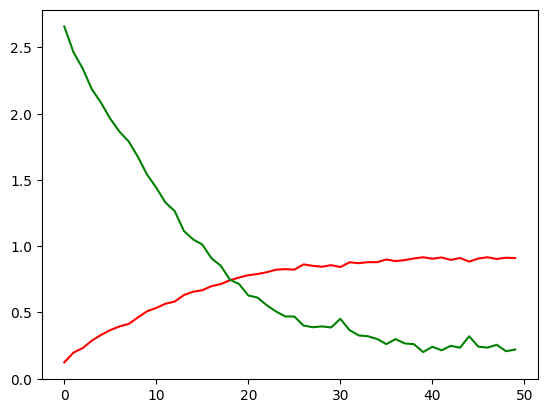

In [5]:
#Tiến hành vẽ đồ thị biểu diễn độ chính và độ mất mát     
accuracy = train.history['accuracy']
loss = train.history['loss']                                                   
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'g',label = 'Training loss')
plt.show()

In [6]:
#Tạo biến để lưu thông tin để dự đoán
insect = {0:'BoCanhCung', 1: 'BoNgua', 2: 'BoRua', 3: 'Buom', 4: 'ChauChau', 5: 'ChuonChuon', 6: 'De', 7: 'Kien', 8: 'Muoi', 9: 'Ong', 10: 'Rep', 11: 'Ret', 12: 'Ruoi', 13: 'Sau', 14: 'VeSau'}

1/1 [==============================] - 0s 275ms/step
Predicted:  Ong


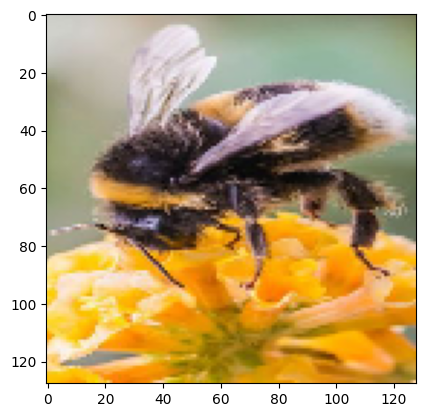

In [7]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Ong/10.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 20ms/step
Predicted:  Kien


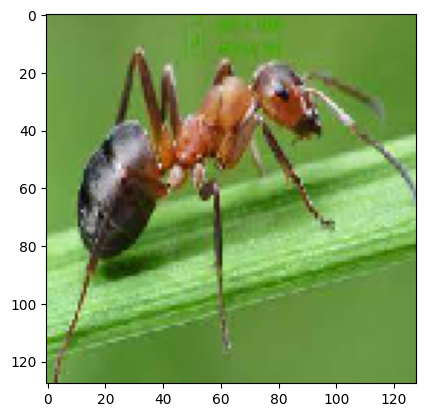

In [10]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Kien/15.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  Rep


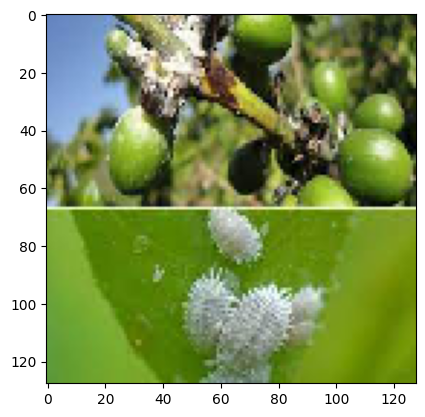

In [15]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Rep/8.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  BoRua


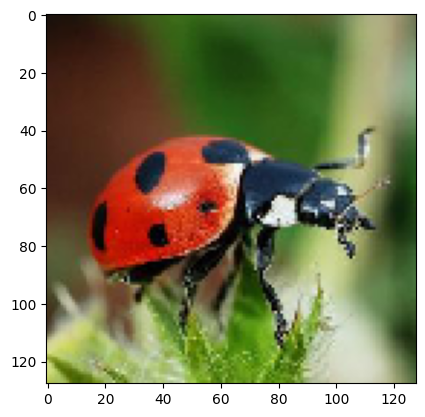

In [16]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/BoRua/100.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 36ms/step
Predicted:  VeSau


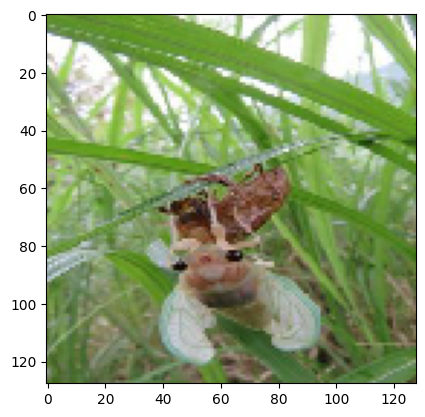

In [22]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/VeSau/92.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 18ms/step
Predicted:  ChuonChuon


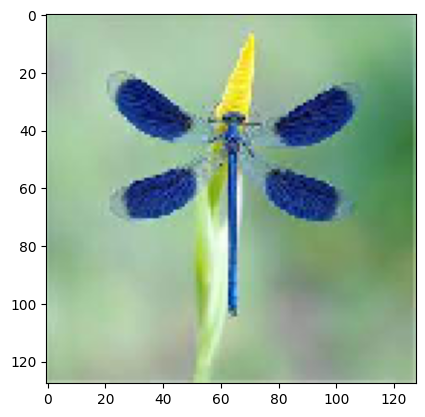

In [39]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/ChuonChuon/82.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 24ms/step
Predicted:  BoCanhCung


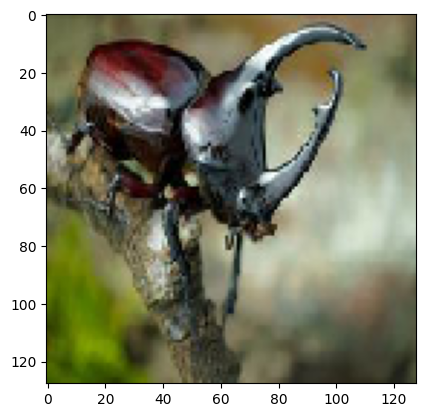

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/BoCanhCung/101.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

In [ ]:
model.save("Cuoiky_Insect.h5")
model_1=load_model('Cuoiky_Insect.h5')

1/1 [==============================] - 0s 23ms/step
Predicted:  Ret


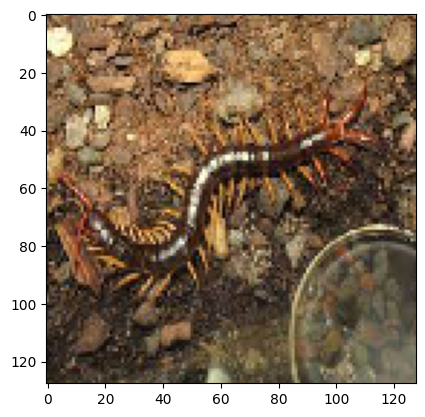

In [40]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Ret/3.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 20ms/step
Predicted:  Muoi


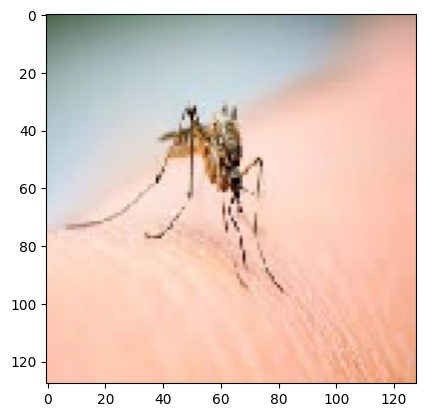

In [47]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Muoi/100.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 20ms/step
Predicted:  ChauChau


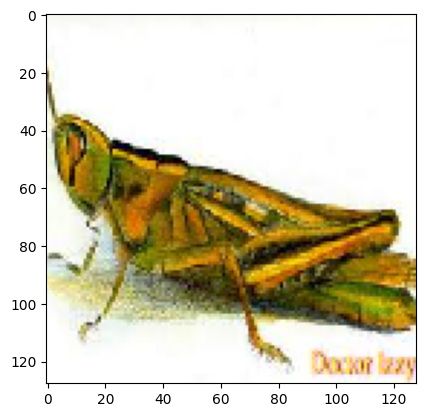

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/ChauChau/91.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  De


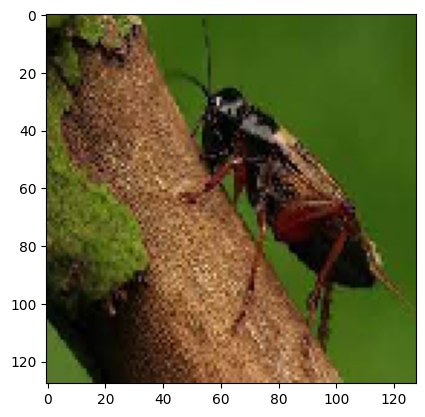

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/De/89.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 49ms/step
Predicted:  Buom


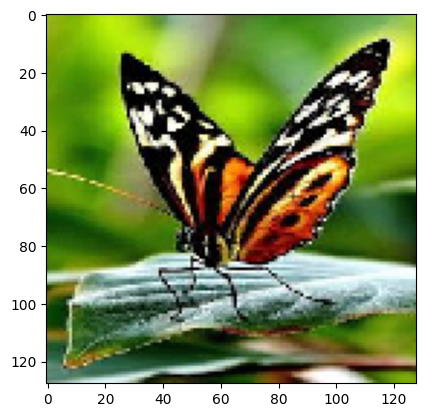

In [ ]:
#Tiến hành kiểm tra lại mô hình bằng hình ảnh trong folder test
filePath = "drive/MyDrive/Insect_test/Buom/100.jpg"
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", insect[pred_value])
plt.imshow(testImage)